In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

%matplotlib inline

In [2]:
def findRange(var):
    global pi
    import math
    pi = math.pi
    rangeUpper = int(math.ceil(pi*var))
    rangeLower = int(math.floor(pi*var))
    return [rangeUpper, rangeLower]

In [3]:
u,l = findRange(500)
print(u, l)

1571 1570


In [4]:
# Python program to display all the prime numbers within an interval
# https://www.programiz.com/python-programming/examples/prime-number-intervals

def findPrimeDenoms(lower,upper):
    denom = []

    for num in range(lower,upper + 1):
        if num > 1:
            for i in range(2,num):
                if (num % i) == 0:
                    break
            else:
                denom.append(num)
    return denom

In [5]:
findPrimeDenoms(0,20)

[2, 3, 5, 7, 11, 13, 17, 19]

In [6]:
# https://stackoverflow.com/questions/2622994/python-finding-lowest-integer
def pi_errorTest(n1,n2):
    result = []
    
    t1 = abs(n1 - pi)/pi
    result.append(t1)
    
    t2 = abs(n2 - pi)/pi
    result.append(t2)
    
    m = min(float(s) for s in result)
    
    return m, result.index(m)

In [7]:
k0 = 11
k1, k2 = findRange(k0)
pi_errorTest(k1/k0,k2/k0)

(0.012804183312061216, 0)

In [9]:
denoms = findPrimeDenoms(0,20)
numers = []

for d in denoms:
    r_u, r_l = findRange(d)
    r_list = [r_u, r_l]
    
    fx = pi_errorTest(r_u/d, r_l/d)
    
    print(d, r_list[fx[1]],fx[0])

2 6 0.04507034144862795
3 9 0.04507034144862795
5 16 0.018591635788130244
7 22 0.0004024994347707008
11 35 0.012804183312061216
13 41 0.0039004102719552014
17 53 0.007622119544652565
19 60 0.005189114264602175


In [10]:
denoms = findPrimeDenoms(0,1000)
numers = []
errors = []

for d in denoms:
    r_u, r_l = findRange(d)
    r_list = [r_u, r_l]
    
    fx = pi_errorTest(r_u/d, r_l/d)
    
    best = r_list[fx[1]]
    
    err = fx[0]
    
    numers.append(best)
    errors.append(err)

In [11]:
results_df = pd.DataFrame()
results_df['denominator'] = denoms
results_df['numerator'] = numers
results_df['error'] = errors

In [12]:
results_df.head(20)

,denominator,numerator,error
0,2,6,0.045070
1,3,9,0.045070
2,5,16,0.018592
3,7,22,0.000402
4,11,35,0.012804
5,13,41,0.003900
6,17,53,0.007622
7,19,60,0.005189
8,23,72,0.003552
9,29,91,0.001166


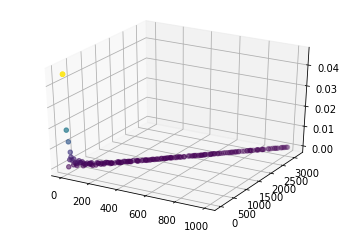

In [13]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(results_df['denominator'], results_df['numerator'], results_df['error'], c=results_df['error'], cmap='viridis');

In [14]:
minVal = np.argmin(errors)

In [15]:
print(minVal)
print(numers[minVal])
print(denoms[minVal])
print(errors[minVal])

29
355
113
8.49136787674061e-08


In [17]:
denoms2 = findPrimeDenoms(75000,200000)
numers2 = []
errors2 = []

for d in denoms2:
    r_u, r_l = findRange(d)
    r_list = [r_u, r_l]
    fx = pi_errorTest(r_u/d, r_l/d)
    best = r_list[fx[1]]
    err = fx[0]
    numers2.append(best)
    errors2.append(err)

In [18]:
len(errors2)

10591

In [19]:
len(denoms2)

10591

In [20]:
len(numers2)

10591

In [21]:
minVal2 = np.argmin(errors2)
print(minVal2)
print(numers2[minVal2])
print(denoms2[minVal2])
print(errors2[minVal2])

10540
626443
199403
1.5362050839871617e-10


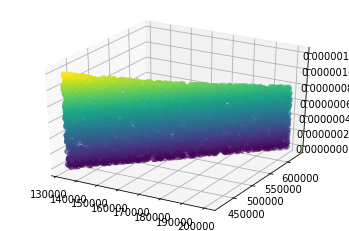

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(denoms2[5000:], numers2[5000:], errors2[5000:], c=errors2[5000:], cmap='viridis');